In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_pickle('US_Accidents_June20_Cleaned.pkl')

In [3]:
df.head()

,ID,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance_mi,Description,Street,...,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Rain_Bool,Snow_Bool,Thunder_Bool,Wind_Bool,Fog_Bool,Hail_Bool,Sand_Dust_Bool
0,A-1,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,False,1.0,True,False,False,False,False,False,False
1,A-2,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,False,False,1.0,True,False,False,False,False,False,False
2,A-3,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,False,True,1.0,False,False,False,False,False,False,False
3,A-4,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,False,False,1.0,False,False,False,False,False,False,False
4,A-5,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,False,True,0.0,False,False,False,False,False,False,False


In [55]:
df.columns

Index(['ID', 'TMC', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance_mi', 'Description', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature_F', 'Humidity_%', 'Pressure_in',
       'Visibility_mi', 'Wind_Direction', 'Wind_Speed_mph', 'Precipitation_in',
       'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Sunrise_Sunset', 'Rain_Bool', 'Snow_Bool',
       'Thunder_Bool', 'Wind_Bool', 'Fog_Bool', 'Hail_Bool', 'Sand_Dust_Bool'],
      dtype='object')

In [4]:
df.isna().sum()

ID                         0
TMC                  1034040
Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
Distance_mi                0
Description                1
Street                     0
Side                       0
City                       0
County                     0
State                      0
Zipcode                  310
Country                    0
Timezone                3121
Airport_Code               0
Weather_Timestamp      42564
Temperature_F          64973
Humidity_%             68928
Pressure_in            55123
Visibility_mi          75097
Wind_Direction         58115
Wind_Speed_mph        453850
Precipitation_in           0
Amenity                    0
Bump                       0
Crossing                   0
Give_Way                   0
Junction                   0
No_Exit                    0
Railway                    0
Roundabout                 0
Station       

In [129]:
def basic_countplot(name, ylog=False, rot=False, sort=False):
    sns.set(rc={"figure.figsize":(10, 3), "figure.dpi":200})
    sns.set(font_scale = 0.6)
    if rot:
        plt.xticks(rotation=30, ha='right')
    if sort:
        p = sns.countplot(x=name, data=df, order = df[name].value_counts().index) 
    else:
        p = sns.countplot(x=name, data=df)
    if ylog:
        p.set(yscale="log")
    # return p

# General Plots

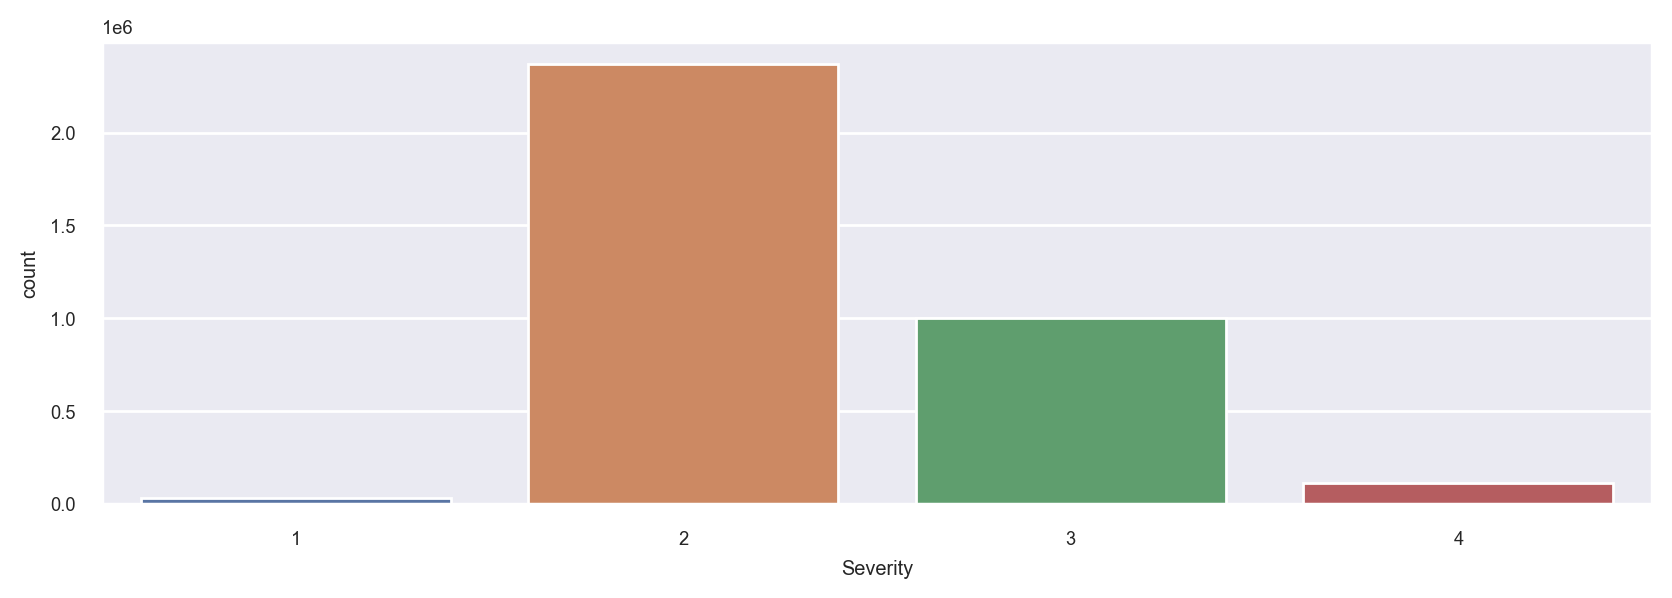

In [130]:
basic_countplot('Severity')

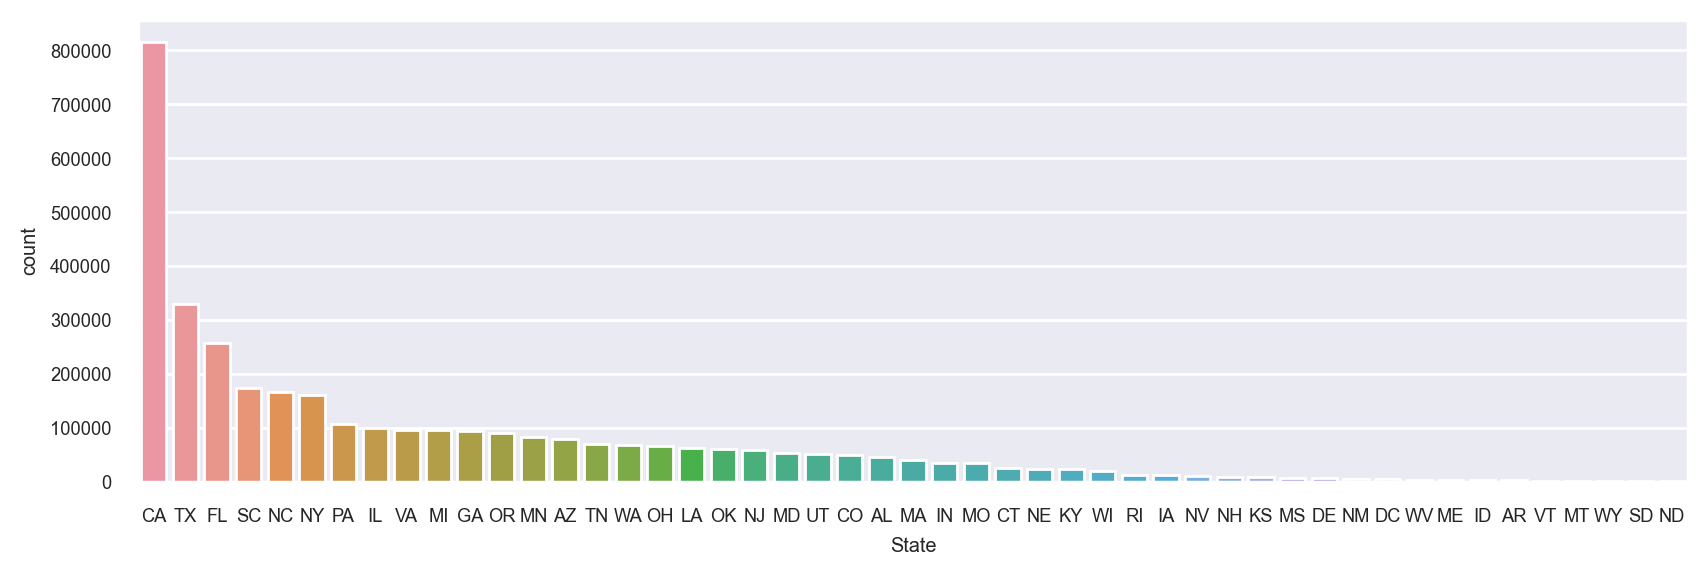

In [131]:
basic_countplot('State', sort=True)

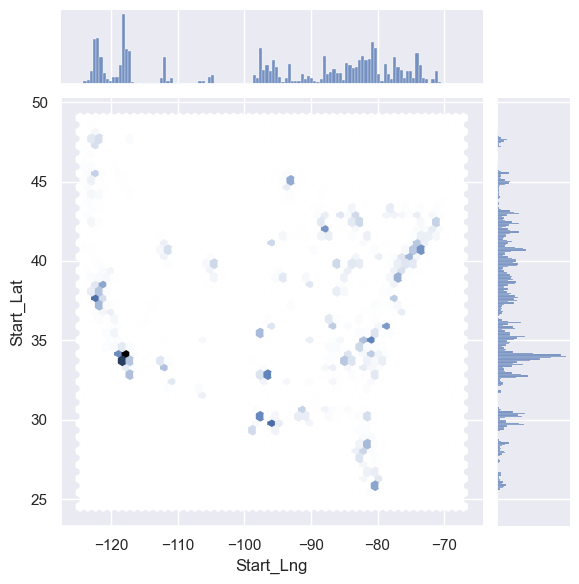

In [8]:
sns.set(rc={"figure.figsize":(16, 16), "figure.dpi":100})
sns.jointplot(x='Start_Lng', y='Start_Lat', data=df, kind='hex')

In [12]:
df['Start_Time'].min(), df['Start_Time'].max()

(Timestamp('2016-02-08 00:37:08'), Timestamp('2020-06-30 23:18:09'))

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

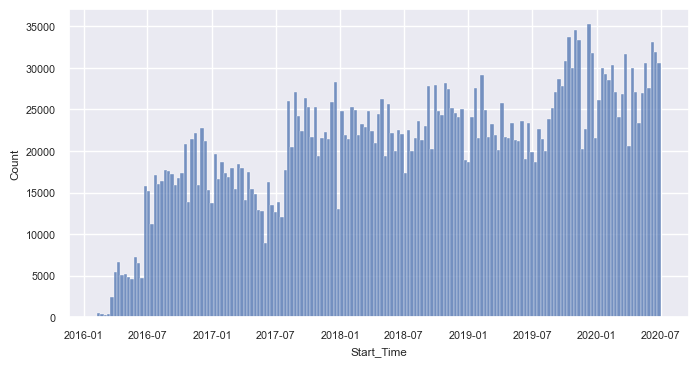

In [14]:
plt.figure(figsize = (8,4))
sns.histplot(data=df, x='Start_Time')

<AxesSubplot:xlabel='End_Time', ylabel='Count'>

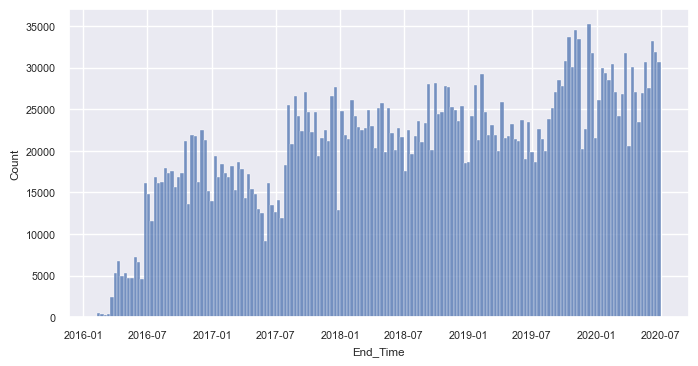

In [15]:
plt.figure(figsize = (8,4))
sns.histplot(data=df, x='End_Time')

<AxesSubplot:>

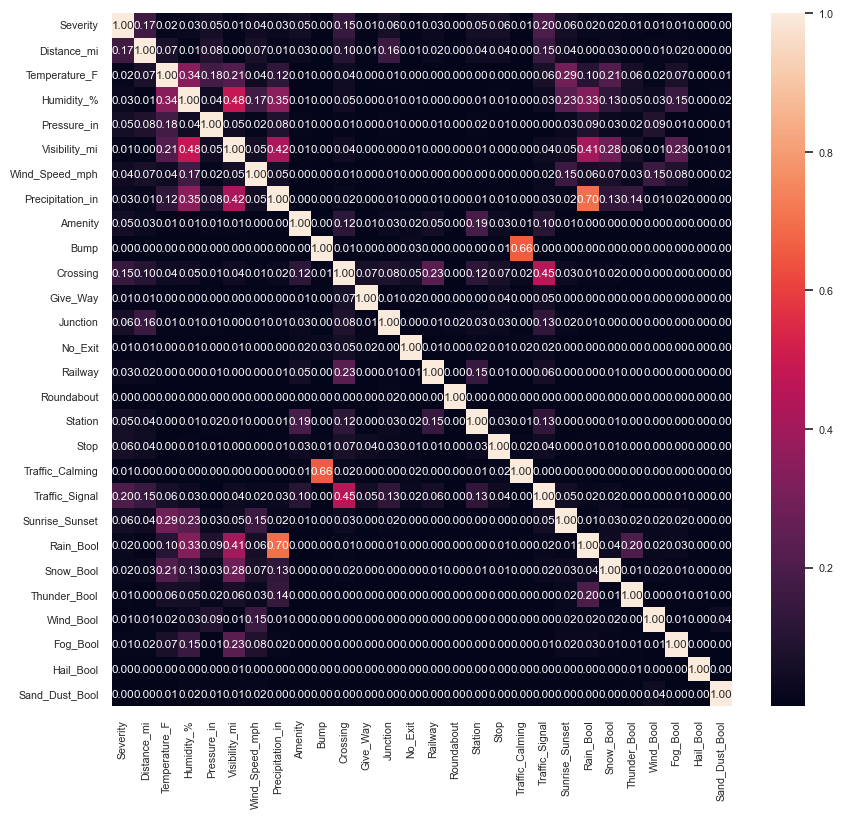

In [9]:
plt.figure(figsize = (10,9))
sns.set(font_scale=0.7)
ignore_cols = ['TMC', 'Start_Lat', 'Start_Lng']
sns.heatmap(abs(df.drop(columns=ignore_cols).corr(method='spearman', numeric_only=True)), annot=True, fmt='.2f')

# Weather

<AxesSubplot:xlabel='Temperature_F', ylabel='Count'>

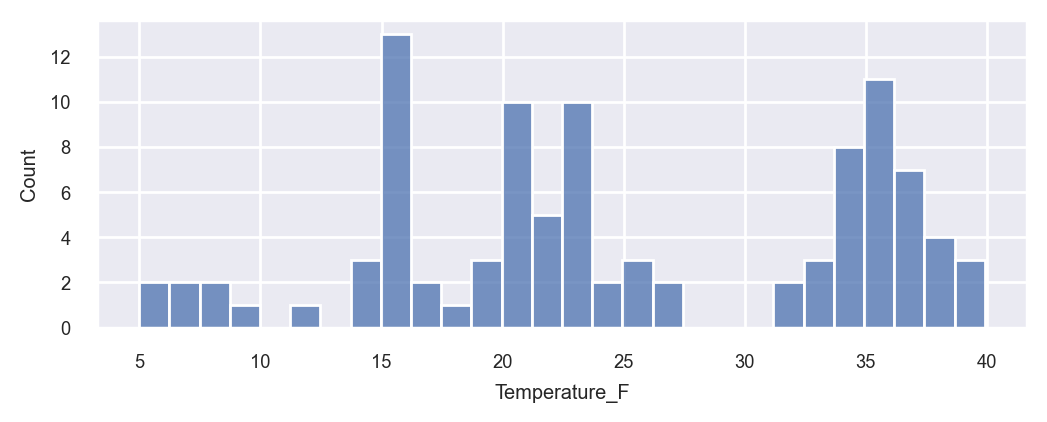

In [106]:
plt.figure(figsize = (6,2))
sns.histplot(data=df.head(100), x='Temperature_F', bins=28)

[None]

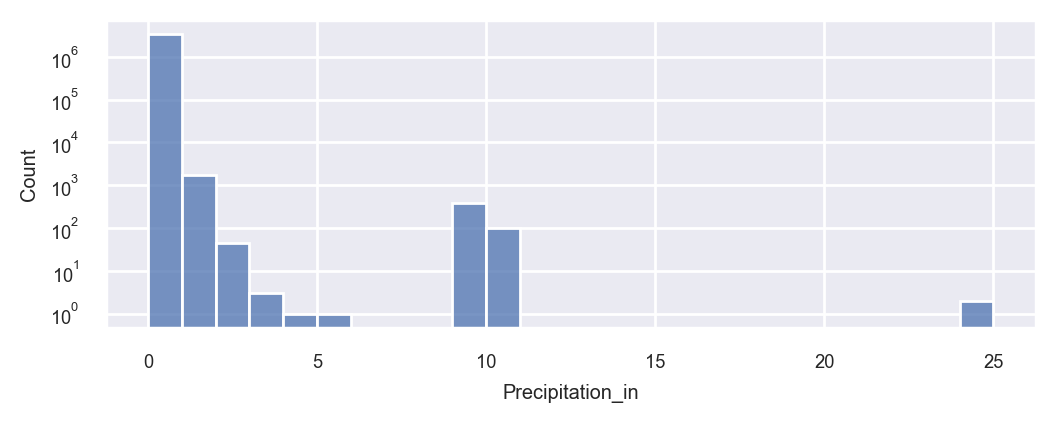

In [98]:
plt.figure(figsize = (6,2))
p = sns.histplot(data=df, x='Precipitation_in', bins=25)
p.set(yscale="log")

[None]

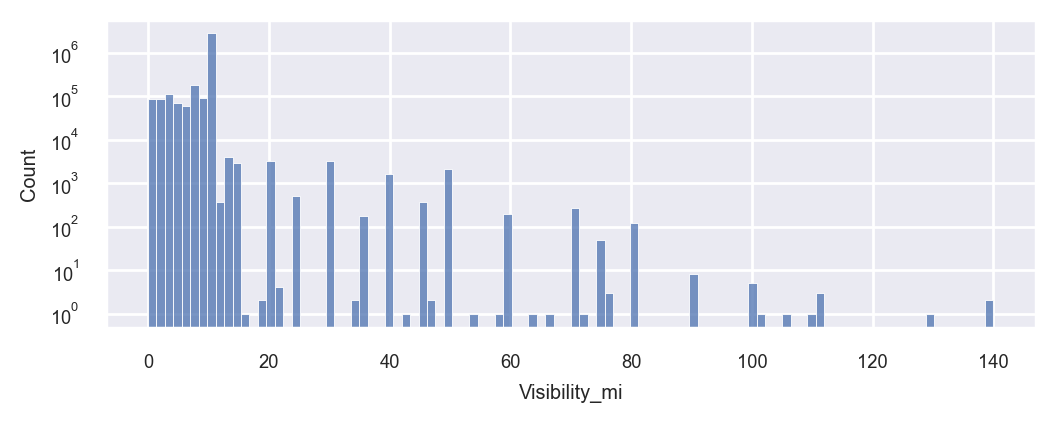

In [112]:
plt.figure(figsize = (6,2))
p = sns.histplot(data=df, x='Visibility_mi', bins=100)
p.set(yscale="log")

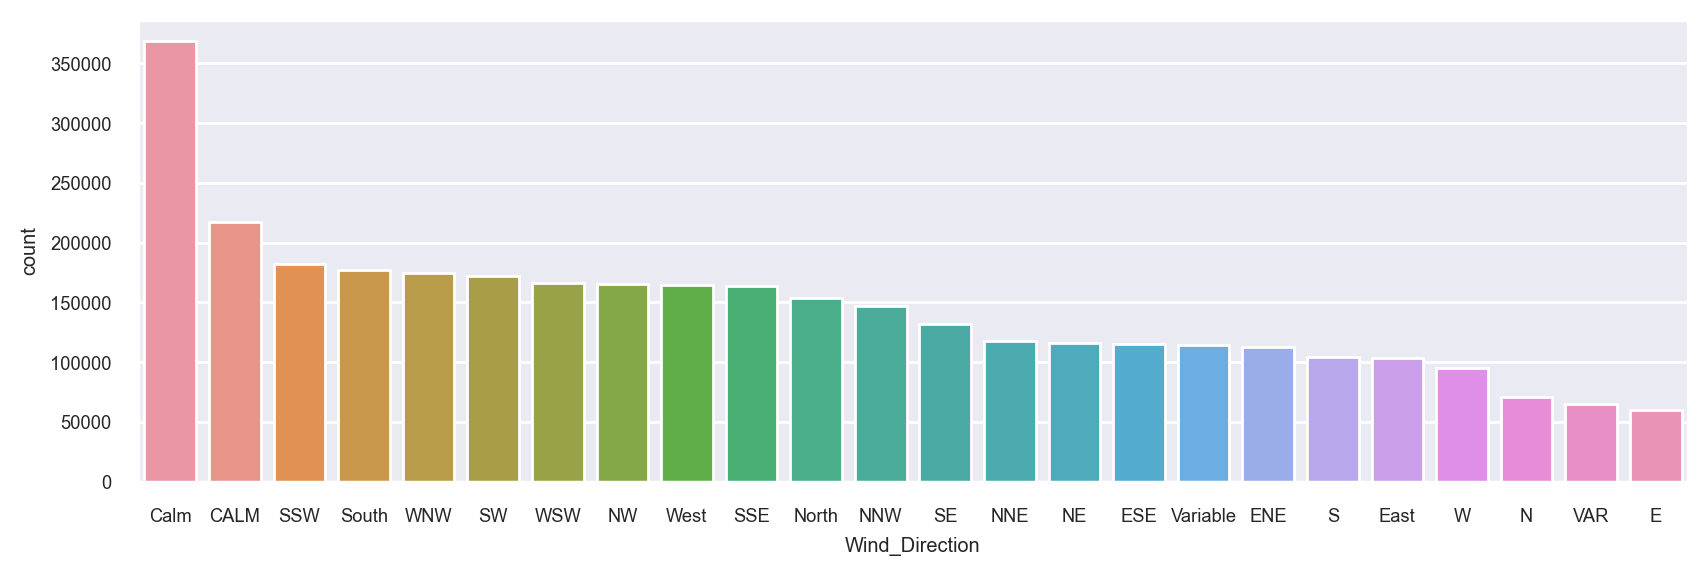

In [114]:
basic_countplot('Wind_Direction', sort=True)

<AxesSubplot:>

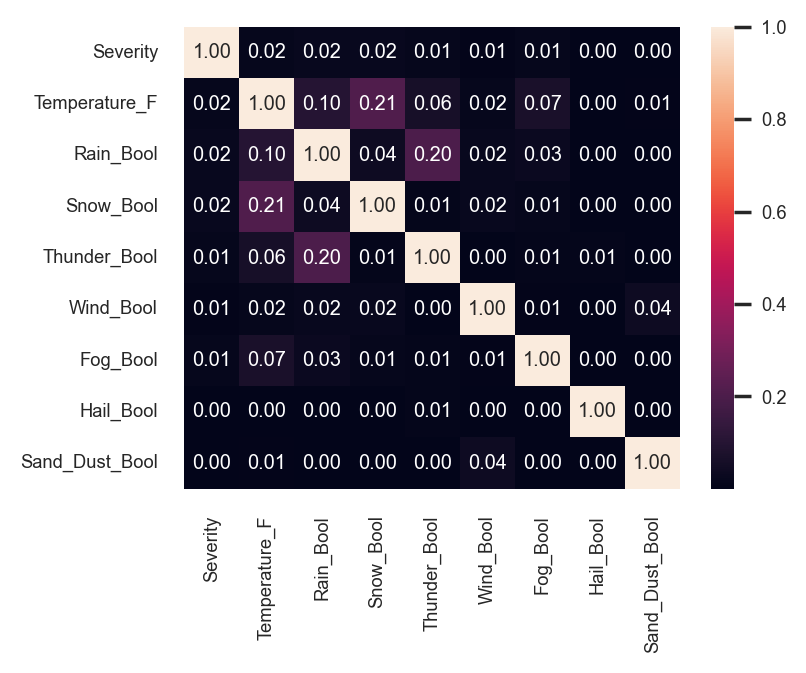

In [85]:
plt.figure(figsize = (4,3))
bcols = [c for c in df.columns if c.endswith('_Bool')]
sns.heatmap(abs(df[['Severity', 'Temperature_F'] + bcols].corr(method='spearman', numeric_only=True)), annot=True, fmt='.2f')

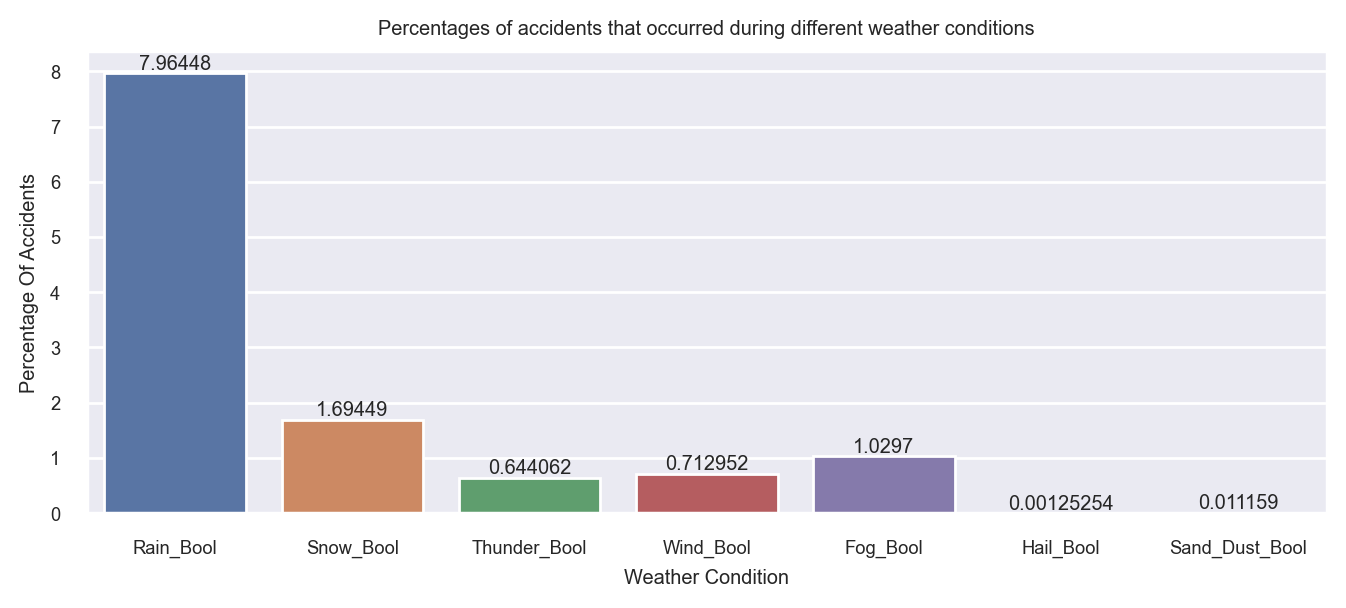

In [81]:
plt.figure(figsize = (8,3))
accidents_per = {name: df[name].sum()/len(df)*100 for name in bcols} 
p = sns.barplot(x=list(accidents_per.keys()), y=list(accidents_per.values()))
p.bar_label(p.containers[0])
plt.xlabel('Weather Condition')
plt.ylabel('Percentage Of Accidents')
plt.title('Percentages of accidents that occurred during different weather conditions')
plt.show()

11.41% of accidents happened during some weather event.


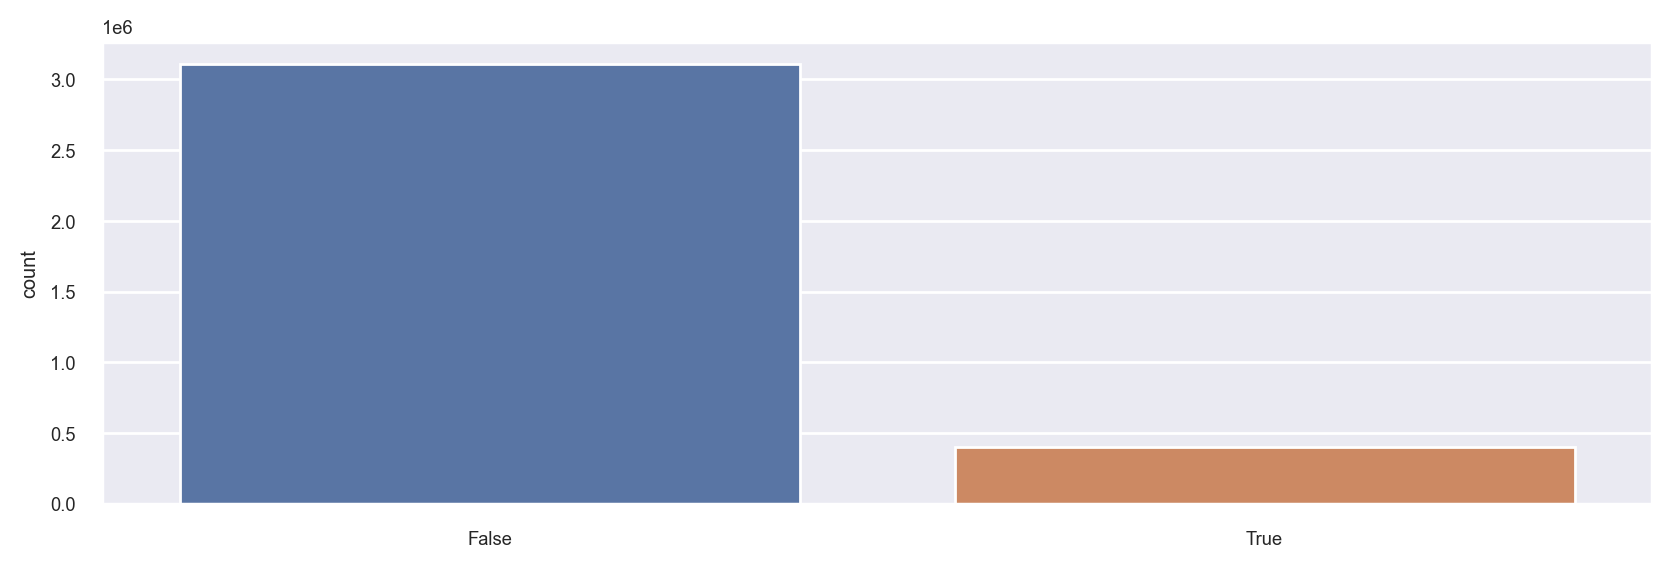

In [149]:
# sns.countplot(
sns.countplot(x = (df[bcols].sum(axis=1) > 0))
print("{:.2f}% of accidents happened during some weather event.".format((df[bcols].sum(axis=1) > 0).sum()*100 / len(df)))

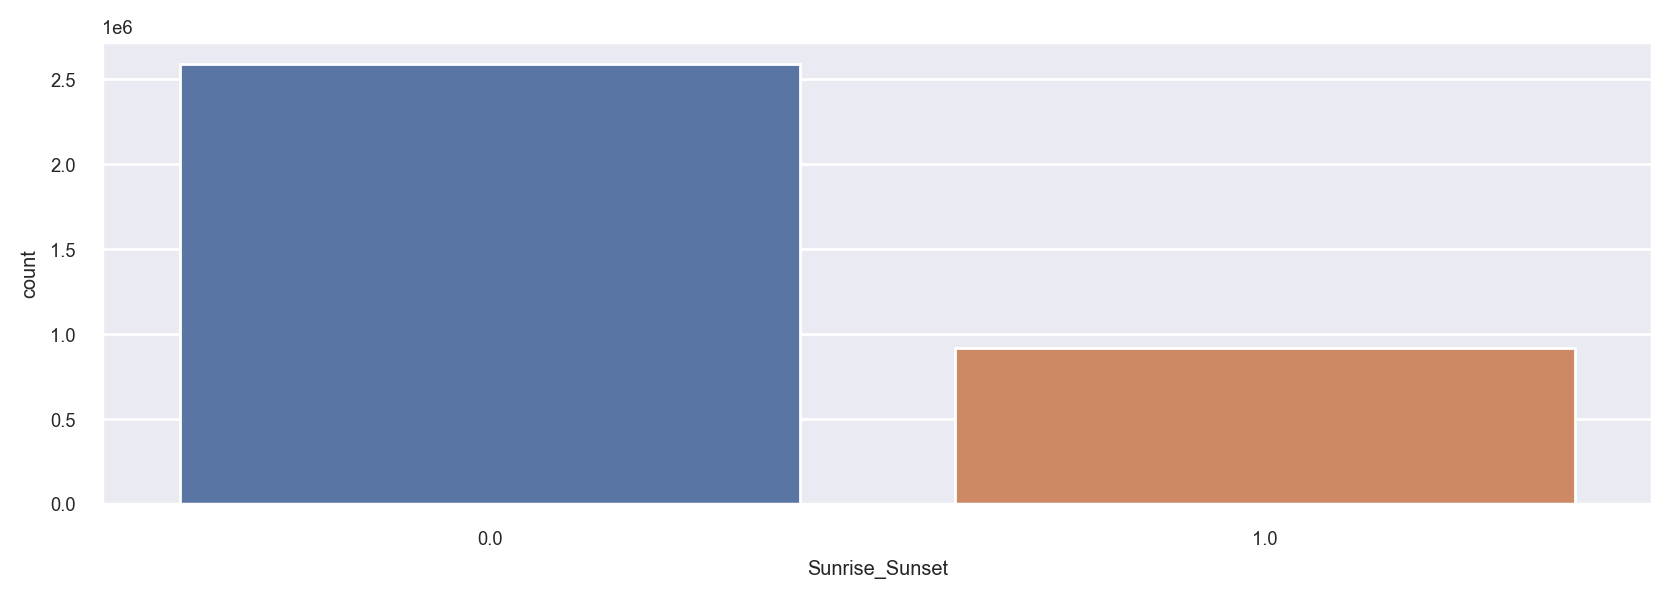

In [137]:
basic_countplot('Sunrise_Sunset')

# Points of Interest

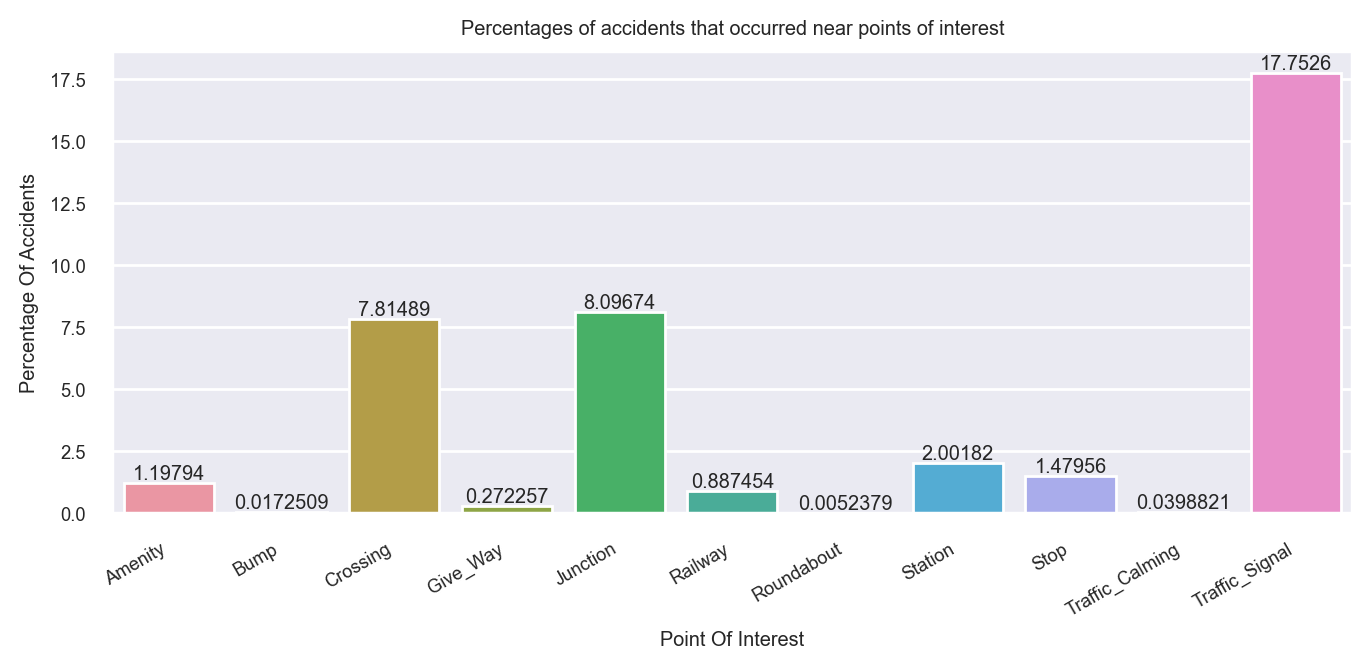

In [136]:
plt.figure(figsize = (8,3))
POIcols = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']
accidents_per = {name: df[name].sum()/len(df)*100 for name in POIcols} 
p = sns.barplot(x=list(accidents_per.keys()), y=list(accidents_per.values()))
# p.set(yscale="log")
p.bar_label(p.containers[0])
plt.xticks(rotation=30, ha='right')
plt.xlabel('Point Of Interest')
plt.ylabel('Percentage Of Accidents')
plt.title('Percentages of accidents that occurred near points of interest')
plt.show()

In [16]:
(df['Airport_Code'] == "").sum() / len(df)
df['Airport_Code'].unique()

array(['KFFO', 'KCMH', 'KI69', ..., 'KY22', 'KAVK', 'KICR'], dtype=object)

In [17]:
# groupby as_index=False?

Text(0.5, 1.0, '25 Airports with most accidents nearby')

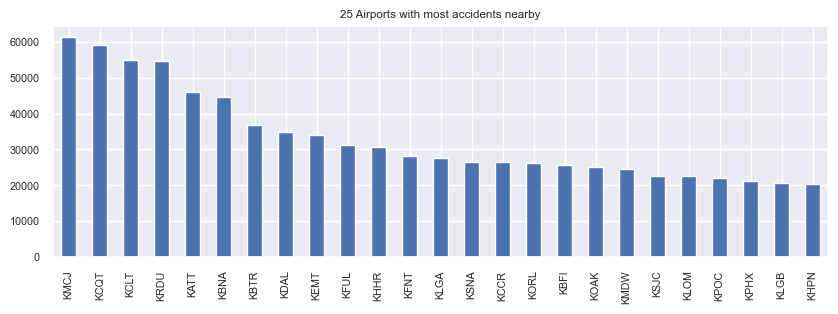

In [37]:
plt.figure(figsize = (10,3))
df['Airport_Code'].value_counts()[:25].plot(kind='bar')
plt.title('25 Airports with most accidents nearby')

In [52]:
import requests

url = "https://www.prokerala.com/travel/airports/united-states-of-america/"
html = requests.get(url).content
df_list = pd.read_html(html)
airportdf = pd.concat(df_list)

In [53]:
airportdf = airportdf[airportdf[1].map(lambda x:len(x)) > 1]
airportdf.columns = airportdf.iloc[0]
airportdf = airportdf.iloc[1:,:].reset_index()
airportdf.drop(columns=["#", "index"],inplace=True)
airportdf

1,Airport Name & City,IATA,ICAO
0,"A L Mangham Jr. Regional Airport Nacogdoches, TX",OCH,NaN
1,AAF Heliport Airport Fort Devens,AYE,NaN
2,Acadiana Regional Airport New Iberia,ARA,KARA
3,Accomack County Airport Melfa,MFV,NaN
4,Adak Island Ns Airport Adak Island,ADK,PADK
...,...,...,...
2231,Zachar Bay SPB Airport Zachar Bay,KZB,NaN
2232,Zahns Airport Amityville,AYZ,NaN
2233,Zanesville Airport Zanesville,ZZV,NaN
2234,Zephyrhills Airport Zephyrhills,ZPH,NaN


In [54]:
len(set(airportdf['ICAO'].unique()).intersection(set(df['Airport_Code'].unique())))

528

In [254]:
trafficdf

,Automobiles_2016,Buses_2016,Trucks_2016,Motorcycles_2016,All_2016,Automobiles_2017,Buses_2017,Trucks_2017,Motorcycles_2017,All_2017,...,Automobiles_2019,Buses_2019,Trucks_2019,Motorcycles_2019,All_2019,Automobiles_2020,Buses_2020,Trucks_2020,Motorcycles_2020,All_2020
State,,,,,,,,,,,,,,,,,,,,,
Alabama,2284443,6238,3067917,109703,5468301,2065463,5682,2872743,112185,5056073,...,2109108,5592,3065778,107730,5288208,2035376.0,5624.0,3164439.0,114901.0,5320340.0
Alaska,183259,8119,571287,31949,794614,173487,8080,591079,31859,804505,...,178516,8645,579985,28129,795275,171144.0,8620.0,586281.0,26781.0,792826.0
Arizona,2377962,9016,3233330,166583,5786891,2391624,9051,3399704,164055,5964434,...,2405959,8407,3407708,160486,5982559,2410018.0,8486.0,3514203.0,121074.0,6053781.0
Arkansas,942604,11931,1762765,90838,2808138,926789,11941,1805510,89457,2833697,...,886647,12032,1833636,169796,2902111,872437.0,12044.0,1859091.0,169797.0,2913369.0
California,14768392,98622,14511913,842106,30221033,14860967,99917,14991714,842543,30795141,...,14894912,100526,15443454,808377,31247270,14201400.0,100828.0,15310597.0,785424.0,30398249.0
Colorado,1807777,12771,3105201,190592,5116341,1785058,13305,3271595,190002,5259960,...,1741218,13485,3471825,185875,5412404,1639028.0,13720.0,3518874.0,179086.0,5350708.0
Connecticut,1352381,12587,1390343,86531,2841842,1302339,11378,1422502,90131,2826350,...,1260954,11729,1520176,85689,2878548,1211171.0,11773.0,1563661.0,80949.0,2867554.0
Delaware,447007,4288,524387,28158,1003840,419199,3763,519961,27810,970733,...,423462,3830,561323,28312,1016927,415915.0,3859.0,582338.0,4023.0,1006135.0
District of Columbia,206833,4682,121149,4436,337100,208141,4885,128700,4290,346016,...,203771,5403,136938,4351,350463,210297.0,5133.0,137540.0,3567.0,356537.0
